In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew
import numpy.linalg as la 
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import re

base=pd.read_csv('bank-additional-full.csv', sep=';')

Because the .csv initially populated all in one column, I need to separate the columns at the semicolon to make sure each feature is distinct.

Pulling basic data information; head(),info(),describe(),check for missing and null values, dimensions

In [2]:
base.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print('.csv dimensions:',base.shape[0],'rows,',base.shape[1],'columns.')

.csv dimensions: 41188 rows, 21 columns.


In [4]:
base.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
base.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
duplicates=base.duplicated()
rows=base[duplicates]
print(rows)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

Break the dataset up into continuous and categorical variables for univariate, bivariate and multivariate analysis.

In [8]:
numerical=base.select_dtypes(exclude='object')
categorical=base.select_dtypes(include='object')

Univariate Analysis

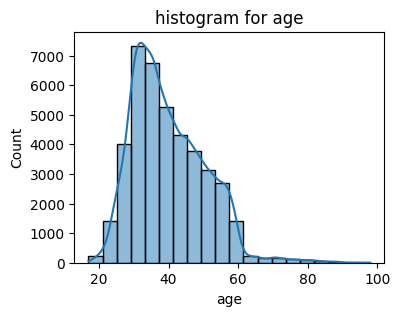

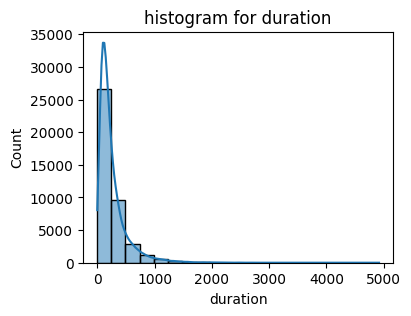

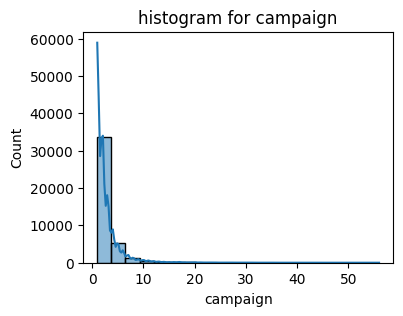

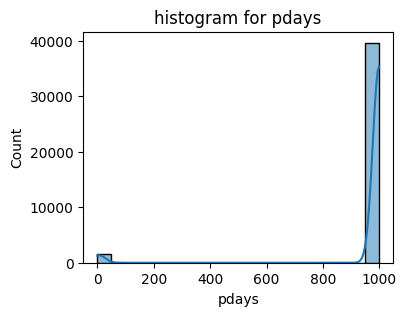

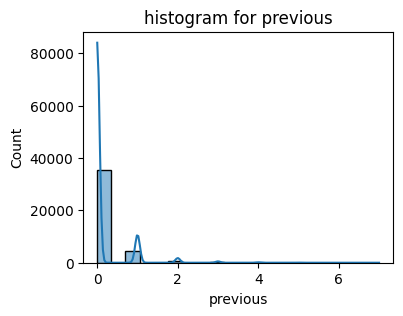

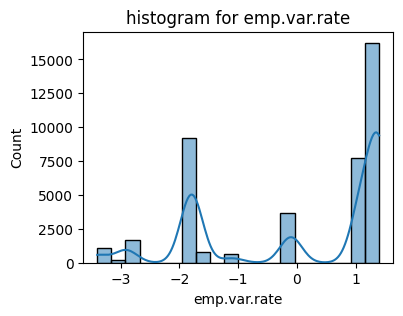

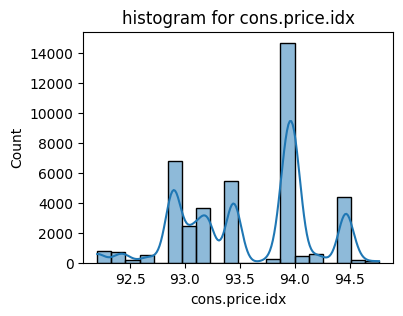

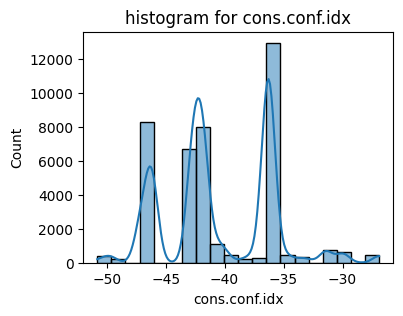

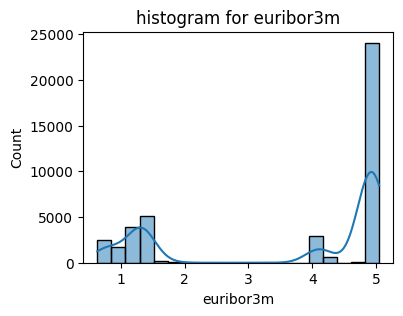

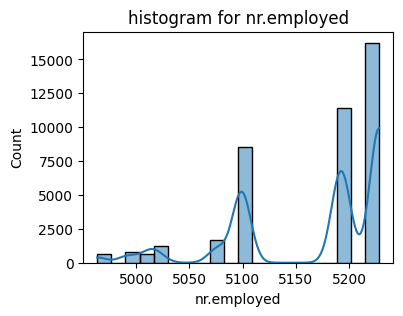

In [9]:
for col in numerical.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(numerical[col],kde=True, bins=20)
    plt.title(f'histogram for {col}')
    plt.show()

We can see the skew in the data via a simple preliminary observation.
Over- and Under-sampling techniques will likely be necessary to make sure that the data is effectively utilized.

Univariate Analysis for Categorical Variables

<Figure size 400x500 with 0 Axes>

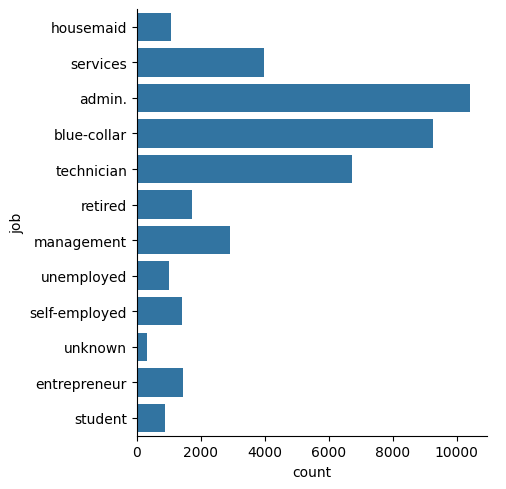

<Figure size 400x500 with 0 Axes>

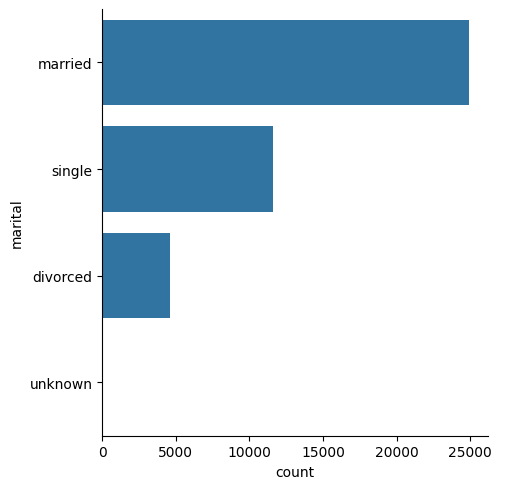

<Figure size 400x500 with 0 Axes>

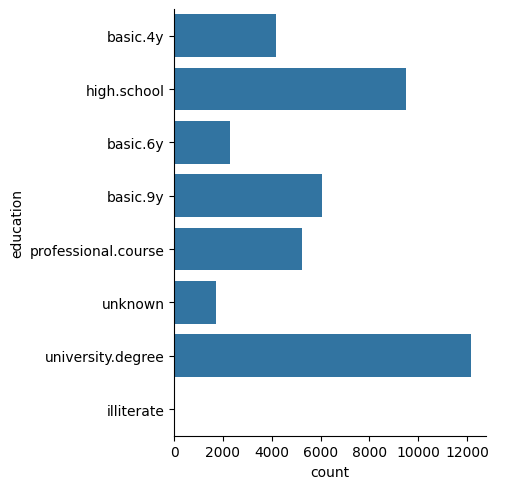

<Figure size 400x500 with 0 Axes>

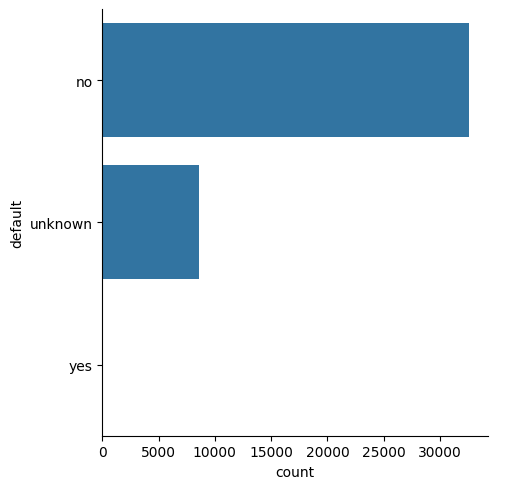

<Figure size 400x500 with 0 Axes>

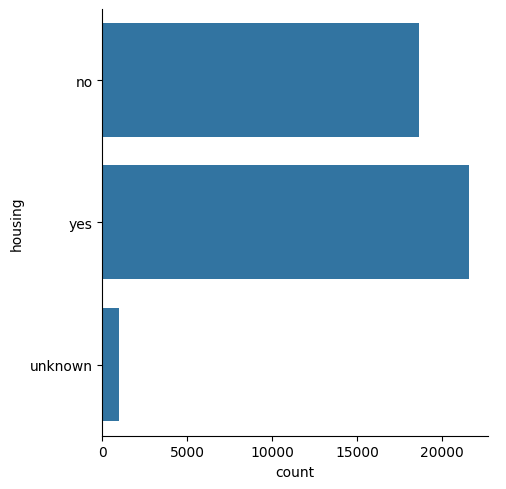

<Figure size 400x500 with 0 Axes>

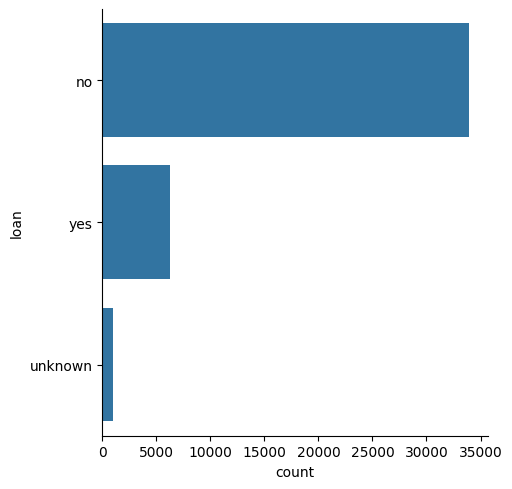

<Figure size 400x500 with 0 Axes>

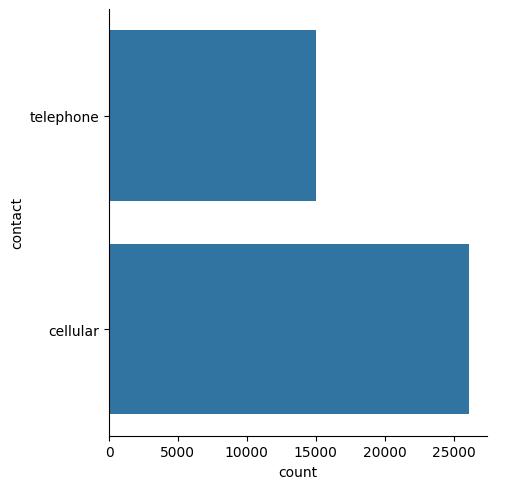

<Figure size 400x500 with 0 Axes>

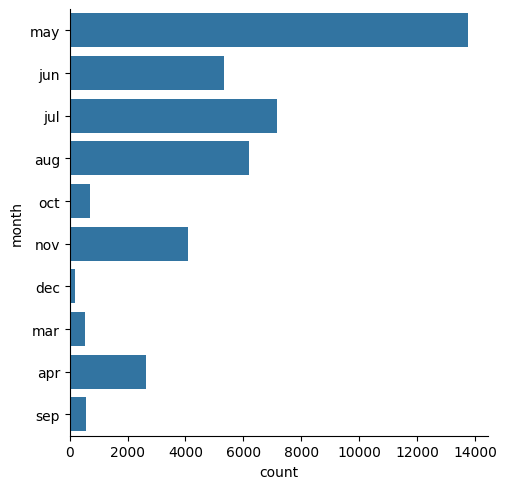

<Figure size 400x500 with 0 Axes>

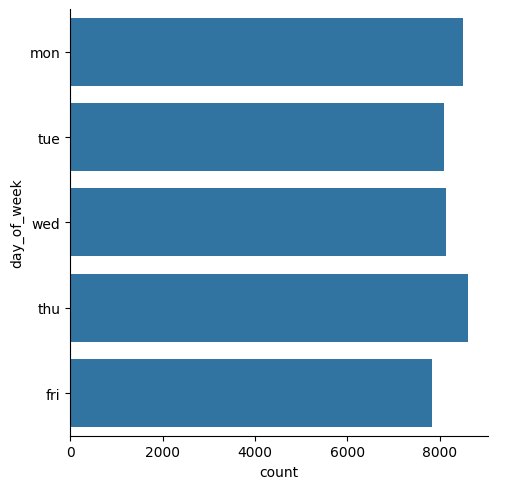

<Figure size 400x500 with 0 Axes>

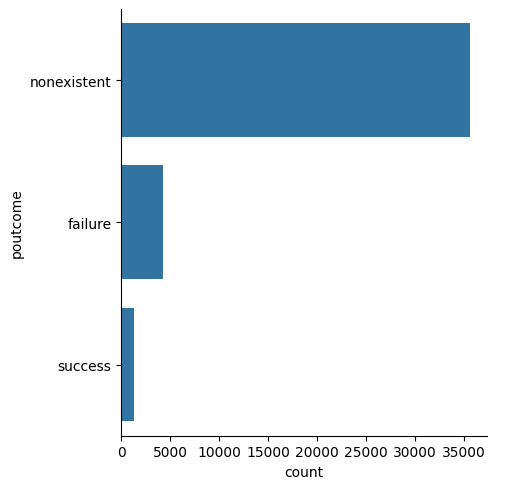

<Figure size 400x500 with 0 Axes>

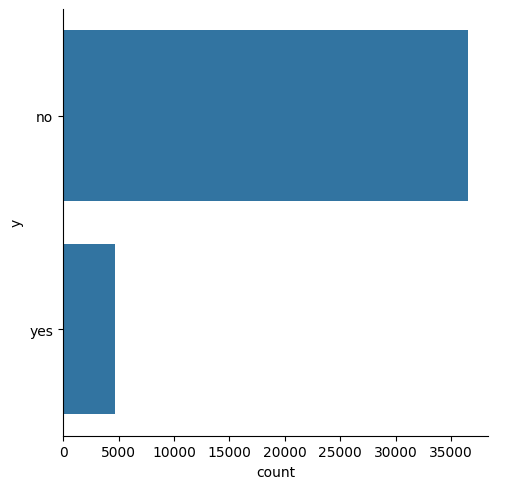

In [10]:
for col in categorical:
    plt.figure(figsize=(4,5))
    sns.catplot(data=categorical,y=categorical[col], kind='count')
    plt.show()

Let's take a look at some combinations of data in a pairplot format

In [11]:
import plotly.express as px
counts = base.groupby(['job', 'education']).size().reset_index(name='count')
fig = px.scatter(
counts,
x='job',
y='education',
size='count',
title='relationship between jobs and education'
)
fig.show()

In [12]:
import plotly.express as px
relationships = base.groupby(['marital', 'education']).size().reset_index(name='count')
fig = px.scatter(
relationships,
x='marital',
y='education',
size='count',
title='relationship between jobs and education'
)
fig.show()

Because we have unknown values in certain columns, let's see if we can clean our data to address the issue. We can start with 'jobs' and 'marital status'.

In [13]:
categorical['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [14]:
categorical['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Because we only have a few rows with unknown values in these columns, let's drop the values.

In [15]:
marriagedrop=base[base['marital']=='unknown'].index
base=base.drop(marriagedrop)

In [16]:
drop=base[base['job'] == 'unknown'].index
base=base.drop(drop)

In [17]:
print('.csv dimensions:',base.shape[0],'rows,',base.shape[1],'columns.')

.csv dimensions: 40787 rows, 21 columns.


For the values with more unknown values, we need to replace with one of the existing categorical variables. Let's try that with 'Loans'

In [18]:
categorical['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [19]:
base['loan']=base['loan'].replace('unknown',np.nan)

let's try mode imputation first.

In [20]:
mode=base['loan'].mode().squeeze()
dist=base['loan'].fillna(mode)

In [21]:
base['loan'].value_counts()

loan
no     33620
yes     6183
Name: count, dtype: int64

Now with housing:

In [22]:
base['housing'].value_counts()

housing
yes        21376
no         18427
unknown      984
Name: count, dtype: int64

In [23]:
base['housing']=base['housing'].replace('unknown',np.nan)
mode=base['housing'].mode().squeeze()
base['housing'].fillna(mode)
base['housing'].value_counts()

housing
yes    21376
no     18427
Name: count, dtype: int64

Because Default has so much missing information, and does not possess a significant relationship, positive or negative, to our target, I am going to drop that column.

In [24]:
base.drop(columns='default', inplace=True)

Label Encoding: Now that we have an idea of our categorical variables, we can label encode them so we can run multivariate analysis.

In [25]:
base1=base.copy(deep=True)

In [26]:
base1.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
numerical_data=base.select_dtypes(include=[np.number])
categorical_data=base.select_dtypes(exclude=[np.number])
for column_name in categorical_data.columns:
  base[column_name + '_encoded']=None
  base[column_name + '_encoded']=label_encoder.fit_transform(base[column_name])

Now let's run some multivariate analyses to compare our target variable with our numerical values.

In [28]:
# sns.pairplot(base, kind='reg')
# plt.title('pairplots')
# plt.show()

I notice a few variables that possess a strong positive correlation with our target variable; we need to keep an eye on that.

Now let's run our bivariate analysis with the label encoded data.

In [29]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  40787 non-null  int64  
 1   job                  40787 non-null  object 
 2   marital              40787 non-null  object 
 3   education            40787 non-null  object 
 4   housing              39803 non-null  object 
 5   loan                 39803 non-null  object 
 6   contact              40787 non-null  object 
 7   month                40787 non-null  object 
 8   day_of_week          40787 non-null  object 
 9   duration             40787 non-null  int64  
 10  campaign             40787 non-null  int64  
 11  pdays                40787 non-null  int64  
 12  previous             40787 non-null  int64  
 13  poutcome             40787 non-null  object 
 14  emp.var.rate         40787 non-null  float64
 15  cons.price.idx       40787 non-null  floa

In [30]:
numericals=base.select_dtypes(exclude='object')

Numerical Bivariate Analysis

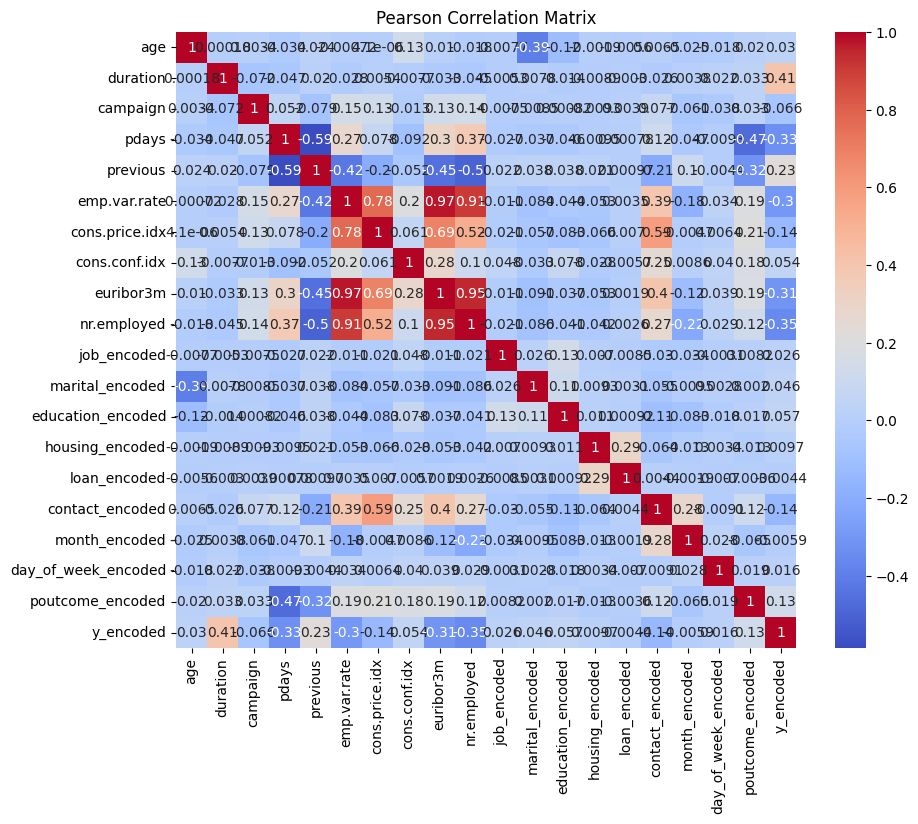

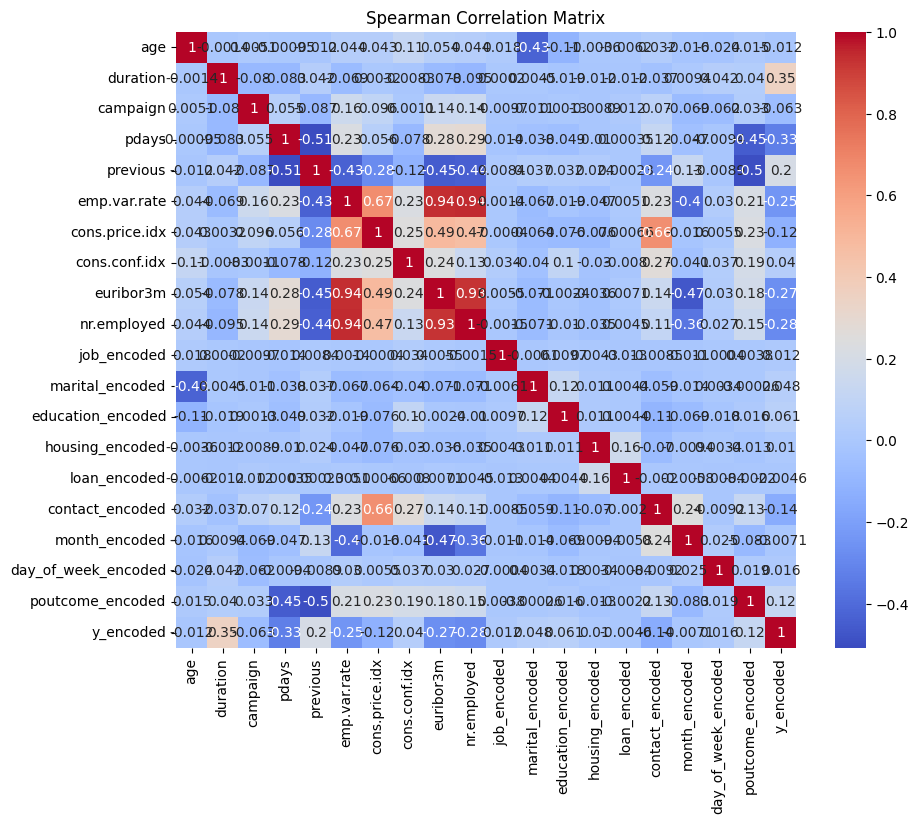

In [31]:
correlators=numericals
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Checking for Multicollinearity using both VIF and Condition Number Calculation

Using statsmodel to calculate VIF

               features           VIF
0                   age     19.412036
1              duration      2.452120
2              campaign      1.930227
3                 pdays    166.021820
4              previous      5.939482
5          emp.var.rate     40.524232
6        cons.price.idx  38769.743118
7         cons.conf.idx    132.041313
8             euribor3m    332.542468
9           nr.employed  44182.492940
10          job_encoded      2.110929
11      marital_encoded      5.706878
12    education_encoded      4.373345
13      housing_encoded      2.327242
14         loan_encoded      1.302906
15      contact_encoded      2.844570
16        month_encoded      6.827040
17  day_of_week_encoded      3.080410
18     poutcome_encoded     34.002891
19            y_encoded      1.714921


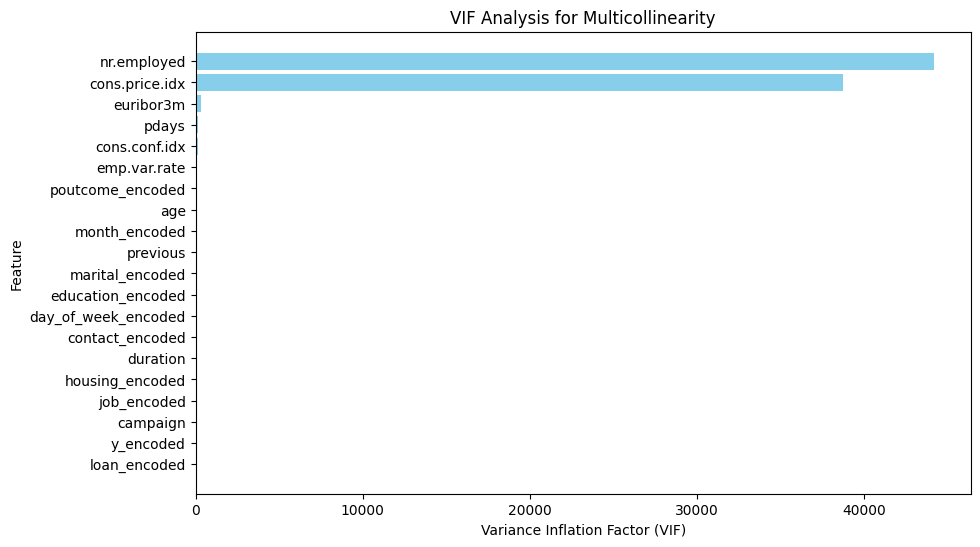

In [32]:

vif_data=pd.DataFrame()
vif_data['features']=numericals.columns
vif_data['VIF']=[variance_inflation_factor(numericals.values,i) for i in range(len(numericals.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

Using numpy to calculate Condition Number,and then running the math from scratch.
A condition number is used to determine how susceptible a given output for a matrix is to differences or inconsistencies in the input data. There are many different types of condition numbers; we are going to determine the 2-norm, or the condition number for inversion, in this instance.

In [33]:
import numpy.linalg as LA

cond=np.linalg.cond(numerical)
print("Condition number for numerical columns:",cond)


Condition number for numerical columns: 26938.749352752082


That condition number is really high, which verifies what we see in the Variance Inflation Factor visualization. Let me use PCA to combine those features, and run the test again.

In [34]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
reducedone=base[['nr.employed','cons.price.idx']].copy(deep=True)
scalar=StandardScaler()
pca=PCA(n_components=1)
scaleddf=scalar.fit_transform(reducedone)
pca.fit(scaleddf)
pca_final=pca.transform(scaleddf)
pca_final=pd.DataFrame(pca_final, columns=['PC1'])
pca_final.head()

,PC1
0,0.747116
1,0.747116
2,0.747116
3,0.747116
4,0.747116


In [35]:
base=pd.concat([base,pca_final], axis=1, join='inner').reset_index()
base1=pd.concat([base1, pca_final],axis=1,join='inner').reset_index()


In [36]:
base.drop(columns=['nr.employed','cons.price.idx', 'index'], inplace=True)
base1.drop(columns=['nr.employed','cons.price.idx', 'index'], inplace=True)


In [37]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40389 entries, 0 to 40388
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            40389 non-null  int64  
 1   job            40389 non-null  object 
 2   marital        40389 non-null  object 
 3   education      40389 non-null  object 
 4   housing        39415 non-null  object 
 5   loan           39415 non-null  object 
 6   contact        40389 non-null  object 
 7   month          40389 non-null  object 
 8   day_of_week    40389 non-null  object 
 9   duration       40389 non-null  int64  
 10  campaign       40389 non-null  int64  
 11  pdays          40389 non-null  int64  
 12  previous       40389 non-null  int64  
 13  poutcome       40389 non-null  object 
 14  emp.var.rate   40389 non-null  float64
 15  cons.conf.idx  40389 non-null  float64
 16  euribor3m      40389 non-null  float64
 17  y              40389 non-null  object 
 18  PC1   

               features         VIF
0                   age   18.487860
1              duration    2.449042
2              campaign    1.922896
3                 pdays  100.298675
4              previous    3.144396
5          emp.var.rate   38.360821
6         cons.conf.idx   83.422024
7             euribor3m  106.556661
8           job_encoded    2.104653
9       marital_encoded    5.562156
10    education_encoded    4.346225
11      housing_encoded    2.324404
12         loan_encoded    1.303282
13      contact_encoded    2.981183
14        month_encoded    5.996329
15  day_of_week_encoded    3.070720
16     poutcome_encoded   19.068789
17            y_encoded    1.653298
18                  PC1   16.567488


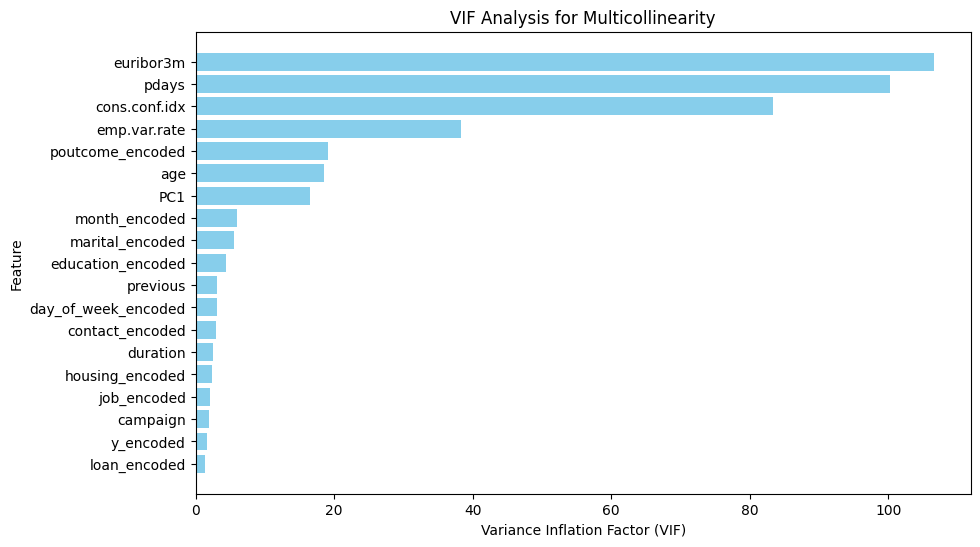

In [38]:
numbers=base.select_dtypes(exclude='object')
vif_data=pd.DataFrame()
vif_data['features']=numbers.columns
vif_data['VIF']=[variance_inflation_factor(numbers.values,i) for i in range(len(numbers.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

Let's run through this process again; I still see a ton of multicollinearity. Let's create more principle components using the top 6 components

In [39]:
reducedone=base[['euribor3m','pdays','cons.conf.idx','emp.var.rate','poutcome_encoded']].copy(deep=True)
scalar=StandardScaler()
pca=PCA(n_components=3)
scaleddf=scalar.fit_transform(reducedone)
pca.fit(scaleddf)
pca_final=pca.transform(scaleddf)
pca_finished=pd.DataFrame(pca_final, columns=['PC3','PC3','PC4'])
pca_finished.head()

,PC3,PC3,PC4
0,1.180103,-0.248016,0.552428
1,1.180103,-0.248016,0.552428
2,1.180103,-0.248016,0.552428
3,1.180103,-0.248016,0.552428
4,1.180103,-0.248016,0.552428


In [40]:
base=pd.concat([base,pca_finished], axis=1, join='inner').reset_index()
base.drop(columns=['euribor3m','pdays','cons.conf.idx','emp.var.rate','poutcome_encoded'], inplace=True)
base1=pd.concat([base1,pca_finished], axis=1, join='inner').reset_index()
base1.drop(columns=['euribor3m','pdays','cons.conf.idx','emp.var.rate'], inplace=True)

In [41]:
base.drop(base.select_dtypes(include='object'), axis=1, inplace=True)

base.head()

,index,age,duration,campaign,previous,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,y_encoded,PC1,PC3,PC3,PC4
0,0,56,261,1,0,3,1,0,0,0,1,6,1,0,0.747116,1.180103,-0.248016,0.552428
1,1,57,149,1,0,7,1,3,0,0,1,6,1,0,0.747116,1.180103,-0.248016,0.552428
2,2,37,226,1,0,7,1,3,1,0,1,6,1,0,0.747116,1.180103,-0.248016,0.552428
3,3,40,151,1,0,0,1,1,0,0,1,6,1,0,0.747116,1.180103,-0.248016,0.552428
4,4,56,307,1,0,7,1,3,0,1,1,6,1,0,0.747116,1.180103,-0.248016,0.552428


In [42]:
base.drop(columns='index',axis=1,inplace=True)
base.to_csv('labeled.csv')

Now that we have our label encoded dataset, let's one-hot encode another copy to use for the ordered numeric models

In [43]:
encoded=pd.get_dummies(categorical,columns=categorical.columns)

In [44]:
encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False


In [45]:
encoded.replace({True:1,False:0}, inplace=True)

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36238/1467855889.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [46]:
encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [47]:
clean=pd.concat([base1,encoded], axis=1, join='inner').reset_index()
clean.drop(columns=clean.select_dtypes(include='object').columns, inplace=True)


In [48]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40389 entries, 0 to 40388
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_0                        40389 non-null  int64  
 1   index                          40389 non-null  int64  
 2   age                            40389 non-null  int64  
 3   duration                       40389 non-null  int64  
 4   campaign                       40389 non-null  int64  
 5   previous                       40389 non-null  int64  
 6   PC1                            40389 non-null  float64
 7   PC3                            40389 non-null  float64
 8   PC3                            40389 non-null  float64
 9   PC4                            40389 non-null  float64
 10  job_admin.                     40389 non-null  int64  
 11  job_blue-collar                40389 non-null  int64  
 12  job_entrepreneur               40389 non-null 

In [49]:
clean=pd.concat([clean,base['y_encoded']],axis=1,join='inner').reset_index(drop=True)
clean.head()

,level_0,index,age,duration,campaign,previous,PC1,PC3,PC3,PC4,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,y_encoded
0,0,0,56,261,1,0,0.747116,1.180103,-0.248016,0.552428,...,1,0,0,0,0,1,0,1,0,0
1,1,1,57,149,1,0,0.747116,1.180103,-0.248016,0.552428,...,1,0,0,0,0,1,0,1,0,0
2,2,2,37,226,1,0,0.747116,1.180103,-0.248016,0.552428,...,1,0,0,0,0,1,0,1,0,0
3,3,3,40,151,1,0,0.747116,1.180103,-0.248016,0.552428,...,1,0,0,0,0,1,0,1,0,0
4,4,4,56,307,1,0,0.747116,1.180103,-0.248016,0.552428,...,1,0,0,0,0,1,0,1,0,0


Finally, let's take a look at feature importance to see if any of our observations are confirmed

Feature 0: 2913.866001
Feature 1: 2913.866001
Feature 2: 34.284604
Feature 3: 6591.867101
Feature 4: 129.081112
Feature 5: 1698.147177
Feature 6: 2553.154815
Feature 7: 2860.332136
Feature 8: 2706.998124
Feature 9: 199.257044
Feature 10: 20.477048
Feature 11: 79.109761
Feature 12: 8.438793
Feature 13: 0.442254
Feature 14: 0.663085
Feature 15: 121.078496
Feature 16: 0.686586
Feature 17: 24.419210
Feature 18: 187.436016
Feature 19: 3.600670
Feature 20: 1.521408
Feature 21: 5.347777
Feature 22: 1.754434
Feature 23: 37.308051
Feature 24: 58.758791
Feature 25: 0.603792
Feature 26: 1.930874
Feature 27: 19.107403
Feature 28: 32.305797
Feature 29: 3.427097
Feature 30: 0.454473
Feature 31: 0.835971
Feature 32: 56.471325
Feature 33: 7.028277
Feature 34: 178.496963
Feature 35: 178.167855
Feature 36: 0.370660
Feature 37: 15.627388
Feature 38: 0.490527
Feature 39: 17.271377
Feature 40: 0.380739
Feature 41: 0.490527
Feature 42: 0.912339
Feature 43: 489.030433
Feature 44: 489.030433
Feature 45: 208.8

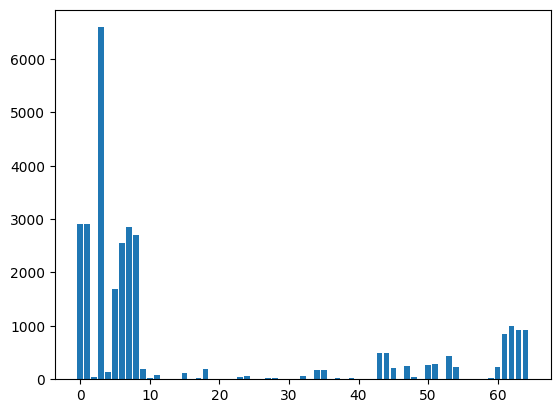

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.model_selection import train_test_split
X=clean.drop(columns='y_encoded', axis=1)
y=clean['y_encoded']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=1)
feat_select=SelectKBest(score_func=f_classif, k='all')
feat_select.fit(X_train, y_train)
X_train_fs=feat_select.transform(X_train)
X_test_fs=feat_select.transform(X_test)
for i in range(len(feat_select.scores_)):
	print('Feature %d: %f' % (i, feat_select.scores_[i]))
#
plt.bar([i for i in range(len(feat_select.scores_))], feat_select.scores_)
plt.show()

Indeed, Feature 3 (Duration) is far more prescriptive than any other feature, which connects with our plotting.

In [51]:
clean.to_csv('clean.csv')